# Repaso de agregragación.
## Replanteamiento del programa de la clase anterior

In [1]:
# clase punto
# solo dos coordenadas (x,y)
# estan atados al origen
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        return

    # el radio en coordenadas polares es la norma
    def norm(self):
        return ((self.x)**2 + (self.y)**2 )**0.5

In [2]:
p = Point(3,4)
p.norm()

5.0

In [3]:
class Segment:
    
    def __init__(self, x1, y1, point):
        self.x1 = x1
        self.y1 = y1
        self.point=point

        # verificar que es un punto el tercer parametro
        if not isinstance(point, Point):
            print("error. La firma debe ser dos coordenadas y un punto de la clase 'Point'")

            return

        # ojo! el punto muta estas dos lineas
        point.x = point.x - self.x1
        point.y = point.y - self.y1

        return

    def lengthSegment(self):
        return point.norm()
        


In [4]:
point = Point(5,6)
seg = Segment(3,4, point) # agregacion

print(seg.lengthSegment())

2.8284271247461903


In [5]:
vars(point)

{'x': 2, 'y': 2}

In [6]:
import numpy as np
p1 = np.array([5,6])
p2 = np.array([3,4])
dist = np.linalg.norm(p1-p2)
dist

2.8284271247461903

In [7]:
seg = Segment(3,4, point) # agregacion
print(seg.lengthSegment())


2.23606797749979


In [8]:
vars(point) # el objeto punto esta mutando

{'x': -1, 'y': -2}

Como podemos solucionar este problema

1. Generar el punto de nuevo.
2. Cambiar el codigo y usar la distancia entre dos puntos en vez de la norma (la distancia al origen desde un punto)

$$d = \sqrt{(x - x_0)^2 + (y-y_0)^2} $$
donde el segmento esta conformado por los puntos
$p_1=(x_0, y_0), p_2=(x,y)$.

3. Usar composicion para arreglar el problema de la sobre-escritura del objeto ```punto```.


Vamos a ilustrar las soluciones 1 y 3.

In [9]:
# volver a redefinir el punto. NO es la mejor
point = Point(5,6)
seg = Segment(3,4, point) # agregacion

print(seg.lengthSegment())

2.8284271247461903


In [10]:
vars(point)

{'x': 2, 'y': 2}

La solucion 2 se arregla con ```composicion```

In [16]:
class Segment:
    
    def __init__(self, x1, y1, point):
        self.x1 = x1
        self.y1 = y1
        self.point=point

        # verificar que es un punto el tercer parametro
        if not isinstance(point, Point):
            print("error. La firma debe ser dos coordenadas y un punto de la clase 'Point'")

            return

        # ojo! el punto muta estas dos lineas
        # point.x = point.x - self.x1
        # point.y = point.y - self.y1

        self.p2 = Point(point.x-x1, point.y-y1) # composicion

        if not isinstance(p2, Point):
            print("error. p2 es un punto de la clase 'Point'")



        return

    def lengthSegment(self):
        return self.p2.norm()
        


In [17]:
point = Point(5,6)
seg = Segment(3,4, point) # agregacion

print(seg.lengthSegment())

seg = Segment(3,4, point) # agregacion

print(seg.lengthSegment())

error. p2 es un punto de la clase 'Point'
2.8284271247461903
error. p2 es un punto de la clase 'Point'
2.8284271247461903


## Clase triangulo
Ojo: ustedes en el proyecto para la semana despues de semansanta van a hacer cuadrilatero y pentagono,
Yo depues hago poligono general y les muestro el codigo en clase.
Si alguien quiere aventurarse a poligono en general le genero 2 calificaciones mas a la cuenta.


In [18]:
class Point:

    def __init__(self, x, y ):
        self.x = x
        self.y = y
        return

    def draw():
        pass


    def __str__(self):
        return f"({self.x}, {self.y})"

    # sobrecarga. Lo explico luego en el curso, la resta de dos puntos
    def  __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y

        return(x,y)

        




In [21]:
import numpy as np
from numpy import sqrt

# clase segmento
class Segment():

    def __init__(self, p1, p2, color='blue'):
        self.p1 = p1
        self.p2 = p2
        self.color=color
        return


    # verificar que los puntos son de la clase Punto
    if not isinstance(p1, Point):
        print("la firma es p1, p2 donde estos son de la clase Punto")


    if not isinstance(p2, Point):
        print("la firma es p1, p2 donde estos son de la clase Punto")

    def length(self):
        return ( sqrt( (self.p2.x - self.p1.x)**2 + (self.p2.y - self.p1.y)**2))

# pruebas
p1 = Point(3,4)
p2 = Point(2,3)
s1 = Segment(p1, p2, "red")
print(s1.p2)
s1.length()




(2, 3)


1.4142135623730951

In [24]:
# clase Triangulo
class Triangle:

    def __init__(self, p1, p2, p3, color="blue"):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

        # construimo los lados del triangulo
        self.side1 = Segment(p1, p2)  # composicion
        self.side2 = Segment(p2,p3)
        self.side3 = Segment(p3,p1)

        return

    def lengthSides(self):
        print(f"lado entre {self.p1} y {self.p2} tiene longitud {self.side1.length()}")
        print(f"lado entre {self.p2} y {self.p3} tiene longitud {self.side2.length()}")
        print(f"lado entre {self.p3} y {self.p1} tiene longitud {self.side3.length()}")

    def perimeter(self):

        # la suma de los lados
        return self.side1.length() + self.side2.length() + self.side3.length()

    def findArea(self):
        vect1 = self.p3 - self.p1
        vect2 = self.p2 - self.p1

        areaMatrix = np.array([vect1, vect2])
        return 0.5*abs(np.linalg.det(areaMatrix))



In [25]:
p1 = Point(1,2)
p2 = Point(3,4)
p3 = Point(-1,3)

t = Triangle(p1,p2,p3)
t.lengthSides()


lado entre (1, 2) y (3, 4) tiene longitud 2.8284271247461903
lado entre (3, 4) y (-1, 3) tiene longitud 4.123105625617661
lado entre (-1, 3) y (1, 2) tiene longitud 2.23606797749979


In [27]:
t.perimeter()

9.187600727863641

In [29]:
t.findArea()

3.0

In [37]:
# generalicemos
import matplotlib.pyplot as plt
class Polygon:

    # recibe una lista de puntos
    def __init__(self, points, color):
        self.points = points
        self.color = color
        return

    def printPoints(self):
        print("The points for the polygon are:")
        for p in self.points:
            print(f"{p}", end='')
        return "   end"

    def draw(self):
        # title
        myStr = ""
        for p in self.points:
            myStr += f" {p}"
        title = f"Polygon for pints {myStr}"

        x = []  
        y = []

        for p in self.points:
            x.append(p.x)
            y.append(p.y)


        x.append(x[0])
        y.append(y[0])

        plt.plot(x,y, color=self.color)
        plt.scatter(x,y, s=80, facecolors='none', edgecolors='k')
        plt.show()

        return

    def defPolygon(self):
        if len(self.points) == 2:
            s = Segment( self.points[0], self.points[1])
            print(f" The polygon is a {self.color} segment ")
        elif len(self.points) == 3:
            t = Triangle(self.points[0], self.points[1], self.points[2])
            print(f"The polyogn is a {self.color} triangle")
            print(f" the length of the sides are:")
            t.lengthSides()
            print(f"The perimter of the triangle is")
            print(t.perimeter())
            print(f" The area of the triangle is")
            print(t.findArea())
        else:
            pass 

        print(self.printPoints())
        print("Here is the figure of the polygon")
        self.draw()
        return

The polyogn is a blue triangle
 the length of the sides are:
lado entre (-1, 2) y (4, 3) tiene longitud 5.0990195135927845
lado entre (4, 3) y (5, 1) tiene longitud 2.23606797749979
lado entre (5, 1) y (-1, 2) tiene longitud 6.082762530298219
The perimter of the triangle is
13.417850021390795
 The area of the triangle is
5.500000000000001
The points for the polygon are:
(-1, 2)(4, 3)(5, 1)   end
Here is the figure of the polygon


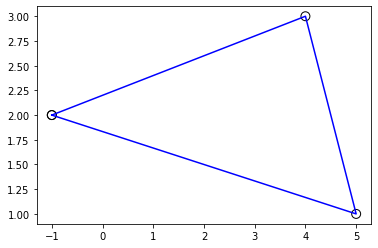

In [38]:
p1 = Point(-1,2)
p2 = Point(4,3)
p3 = Point(5,1)

l = [p1, p2, p3]
pol = Polygon(l, "blue") # aggregation

pol.defPolygon()